In [12]:
%matplotlib inline

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from IPython.display import Audio
import librosa
import librosa.display

tfrecords_filename = 'nsynth-train.tfrecord'

In [2]:
def nsynth_generator(tfrecords_filename):
    for serialized_example in tf.python_io.tf_record_iterator(tfrecords_filename):
        example = tf.train.Example()
        example.ParseFromString(serialized_example)
        f = example.features.feature
        i=0
#         result = tf.train.Example.FromString(serialized_example)
#         print(result)
        data_array = []

        audio = np.array(f['audio'].float_list.value)

        data = {
            'note':
                f['note'].int64_list.value[i],
            'note_str':
                f['note_str'].bytes_list.value[i],
            'instrument':
                f['instrument'].int64_list.value[i],
            'instrument_str':
                f['instrument_str'].bytes_list.value[i],
            'pitch':
                f['pitch'].int64_list.value[i],
            'velocity':
                f['pitch'].int64_list.value[i],
            'samplerate':
                f['sample_rate'].int64_list.value[i],
            'audio':
                np.array(f['audio'].float_list.value),
            'qualities':
                np.array(f['qualities'].int64_list.value),
            'qualities_str':
                np.array(f['qualities_str'].int64_list.value),
            'instrument_family':
                f['instrument_family'].int64_list.value[i],
            'instrument_family_str':
                f['instrument_family_str'].bytes_list.value[i],
            'instrument_source':
                f['instrument_family'].int64_list.value[i],
            'instrument_source_str':
                f['instrument_source_str'].bytes_list.value[i],
        }
#         print(data)

        yield example.SerializeToString(), f, data, audio

In [3]:
def filterData(inputFile, outputFile):
    dataset = nsynth_generator(inputFile)
    count = 1
    data = next(dataset)
    writer = tf.python_io.TFRecordWriter(outputFile)
    try:
        while data:
            if data[1]["instrument_family"].int64_list.value[0] == 4:
                writer.write(data[0])
            print(data[2])
            data = next(dataset)
    except StopIteration:
        pass
    writer.close()

In [4]:
inputFile = "nsynth-train.tfrecord"
outputFile = "filtered_data_keyboard.tfrecord"
gen_samples = nsynth_generator(outputFile)
data, f, metadata, audio = next(gen_samples)
data, f, metadata, audio = next(gen_samples)
data, f, metadata, audio = next(gen_samples)

# Audio(audio, rate=22050)

In [5]:

# filterData(inputFile, outputFile)

In [6]:
# print(len(audio))
# Audio(audio, rate=metadata['samplerate'])
# plt.plot(audio)

In [7]:
# for example in tf.python_io.tf_record_iterator(tfrecords_filename):
#     result = tf.train.Example.FromString(example)
#     print(result)

[[-39.24286706 -39.20285616 -39.14986392 ... -79.86042243 -79.86042243
  -79.86042243]
 [-47.65484182 -48.4188032  -50.37204551 ... -79.86042243 -79.86042243
  -79.86042243]
 [-47.36015603 -47.05593564 -46.41410933 ... -79.86042243 -79.86042243
  -79.86042243]
 ...
 [-79.86042243  -0.17213774  -1.7691701  ... -79.86042243 -79.86042243
  -79.86042243]
 [-79.86042243   0.13957757  -1.3592978  ... -79.86042243 -79.86042243
  -79.86042243]
 [-71.9405125   -9.8767972  -12.1232504  ... -79.86042243 -79.86042243
  -79.86042243]]


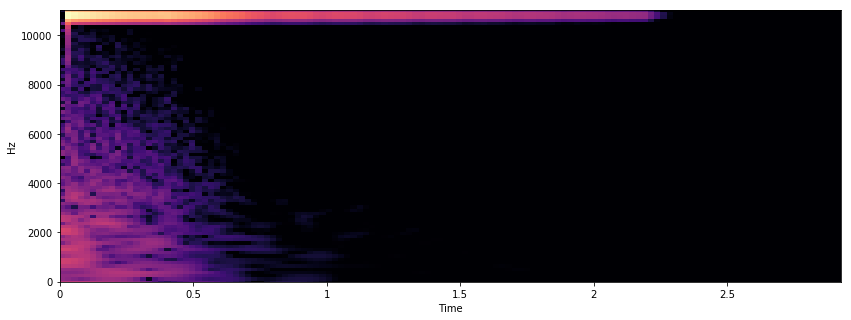

In [15]:
X = librosa.cqt(audio)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=22050, x_axis='time', y_axis='hz')